# Wine

In [9]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


split train test 

*  class 1: train 30 test 29
*  class 2: train 36 test 35
*  class 3: train 24 test 24

1.   k-NN (vary K) plot accuracy
2.   k-means (vary K) accuracy (K=3)



In [10]:
np.unique(df.iloc[:, 0].values, return_counts=True)

(array([1, 2, 3]), array([59, 71, 48]))

In [11]:
itrain = np.r_[0:30, 59:(59+36), (59+36+35):(59+36+35+24)]

In [13]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [14]:
all_i = list(range(len(X)))
itest = np.array(list(set(all_i) - set(itrain)))

In [15]:
Xtrain = X[itrain]
Xtest = X[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [24]:
def KNN(x, k):
  m = np.sum(np.square(Xtrain - x), axis=1)
  nearest_k = np.argsort(m)[:k]
  nearest_labels = Ytrain[nearest_k]
  unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
  most_common_index = np.argmax(label_counts)
  most_common_label = unique_labels[most_common_index]
  
  return most_common_label


In [25]:
kz = []
for k in range(1, 90):
  z = []
  for x in Xtest:
    z.append(KNN(x, k))
    # print(KNN(x, k))
  z = np.array(z)
  acc = np.sum(z == Ytest) / len(z) * 100
  d = {'k': k, 'Accuracy': acc}
  kz.append(d)

In [26]:
kz

[{'k': 1, 'Accuracy': 71.5909090909091},
 {'k': 2, 'Accuracy': 67.04545454545455},
 {'k': 3, 'Accuracy': 67.04545454545455},
 {'k': 4, 'Accuracy': 68.18181818181817},
 {'k': 5, 'Accuracy': 70.45454545454545},
 {'k': 6, 'Accuracy': 68.18181818181817},
 {'k': 7, 'Accuracy': 69.31818181818183},
 {'k': 8, 'Accuracy': 69.31818181818183},
 {'k': 9, 'Accuracy': 70.45454545454545},
 {'k': 10, 'Accuracy': 69.31818181818183},
 {'k': 11, 'Accuracy': 72.72727272727273},
 {'k': 12, 'Accuracy': 70.45454545454545},
 {'k': 13, 'Accuracy': 68.18181818181817},
 {'k': 14, 'Accuracy': 69.31818181818183},
 {'k': 15, 'Accuracy': 69.31818181818183},
 {'k': 16, 'Accuracy': 68.18181818181817},
 {'k': 17, 'Accuracy': 69.31818181818183},
 {'k': 18, 'Accuracy': 67.04545454545455},
 {'k': 19, 'Accuracy': 68.18181818181817},
 {'k': 20, 'Accuracy': 67.04545454545455},
 {'k': 21, 'Accuracy': 69.31818181818183},
 {'k': 22, 'Accuracy': 69.31818181818183},
 {'k': 23, 'Accuracy': 70.45454545454545},
 {'k': 24, 'Accuracy'

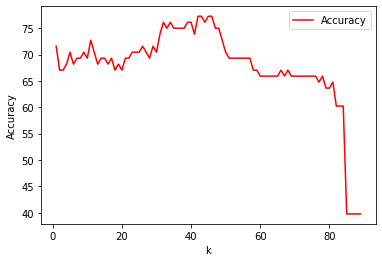

In [27]:
import matplotlib.pyplot as plt

k = [d['k'] for d in kz]
accuracy = [d['Accuracy'] for d in kz]

plt.plot(k, accuracy, color='red', label='Accuracy')

plt.xlabel("k")
plt.ylabel("Accuracy")

plt.legend()

plt.show()